## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [96]:
df=pd.read_csv('iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [97]:
df.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [98]:
df['SepalLengthCm']=df['SepalLengthCm'].fillna(df['SepalLengthCm'].median())
df['SepalWidthCm']=df['SepalWidthCm'].fillna(df['SepalWidthCm'].median())
df['PetalLengthCm']=df['PetalLengthCm'].fillna(df['PetalLengthCm'].median())
df['PetalWidthCm']=df['PetalWidthCm'].fillna(df['PetalWidthCm'].median())

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [99]:
df['Species'].value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [100]:
df['Species']=df['Species'].replace(to_replace=['Iris-virginica','Iris-setosa','Iris-versicolor'],value=[0,1,2])

In [101]:
df['Species'].value_counts()

0    52
1    50
2    50
Name: Species, dtype: int64

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

<AxesSubplot:>

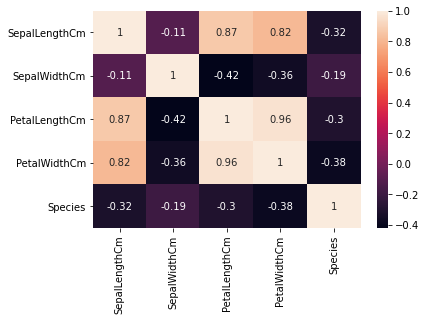

In [102]:
sns.heatmap(df.corr(),annot=True)

There are no variables with correlation in the range -0.1 to 0.1 with target variable.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [103]:
df.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

No variable with variance < 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

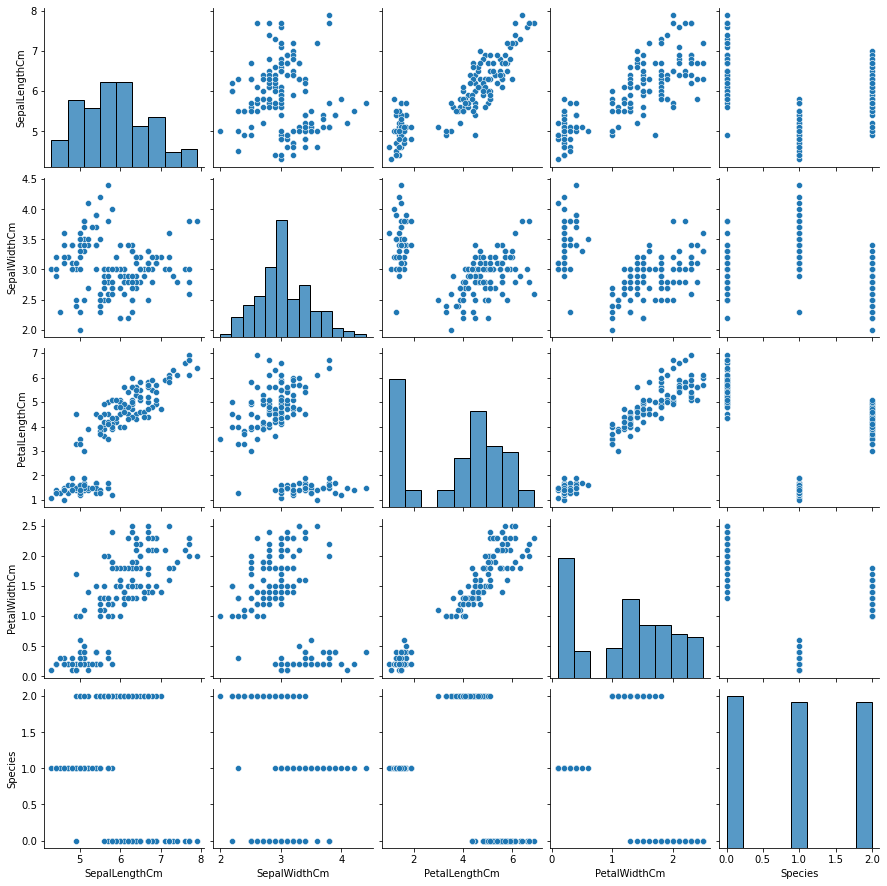

In [104]:
sns.pairplot(df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [105]:
X=df.drop('Species',axis=1)
y=df['Species']
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.20,random_state=22)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [106]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn_model1=knn1.fit(X_train,y_train)
y_pred1=knn_model1.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)

In [107]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn_model2=knn2.fit(X_train,y_train)
y_pred2=knn_model2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)

In [108]:
knn3=KNeighborsClassifier(n_neighbors=9)
knn_model3=knn3.fit(X_train,y_train)
y_pred3=knn_model3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)

In [109]:
print("For k=3, Accuracy is",acc1)
print("For k=5, Accuracy is",acc2)
print("For k=9, Accuracy is",acc3)

For k=3, Accuracy is 0.967741935483871
For k=5, Accuracy is 1.0
For k=9, Accuracy is 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [110]:
tuned_paramaters = {'n_neighbors': np.arange(1, 20, 2)}
knn=KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'n_neighbors': 5} 



Optimal number of neighbours = 5

In [111]:
k=np.arange(1,20,2)
m=[]
for i in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn_model=knn.fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    mse=1-acc
    m.append(mse)
    print("For k=",i,"- Misclassification error (MSE) =",mse)

For k= 1 - Misclassification error (MSE) = 0.032258064516129004
For k= 3 - Misclassification error (MSE) = 0.032258064516129004
For k= 5 - Misclassification error (MSE) = 0.0
For k= 7 - Misclassification error (MSE) = 0.032258064516129004
For k= 9 - Misclassification error (MSE) = 0.0
For k= 11 - Misclassification error (MSE) = 0.0
For k= 13 - Misclassification error (MSE) = 0.0
For k= 15 - Misclassification error (MSE) = 0.0
For k= 17 - Misclassification error (MSE) = 0.0
For k= 19 - Misclassification error (MSE) = 0.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

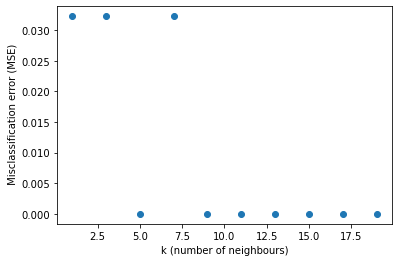

In [112]:
plt.scatter(k,m)
plt.xlabel("k (number of neighbours)")
plt.ylabel(" Misclassification error (MSE)")
plt.show()

# Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

### Question 1
#### Import Iris.csv

In [113]:
df1=pd.read_csv('iris.csv',index_col=0)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [114]:
X=df.drop('Species',axis=1)
y=df['Species']

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

<AxesSubplot:xlabel='Species', ylabel='Count'>

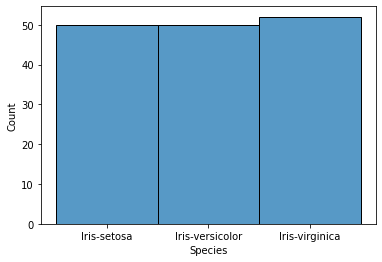

In [115]:
sns.histplot(df1['Species'])

### Plot the distribution of target variable using histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

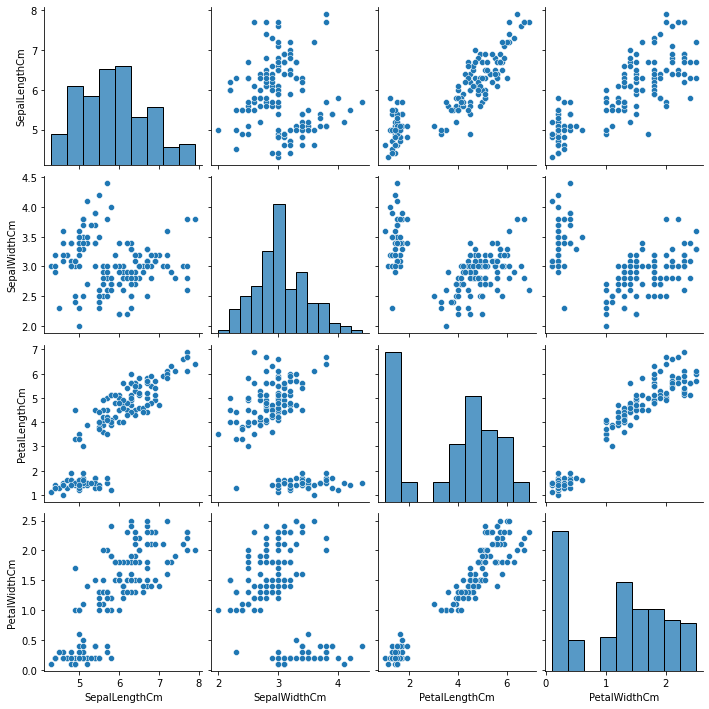

In [116]:
sns.pairplot(df1)

### Question 3
#### Find Correlation among all variables and give your insights 

<AxesSubplot:>

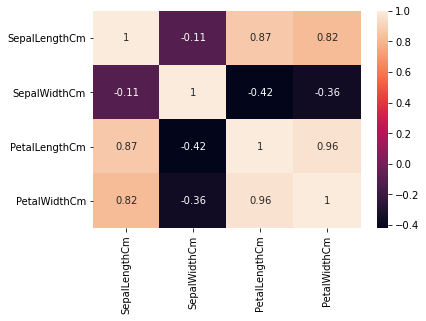

In [117]:
sns.heatmap(df1.corr(),annot=True)

### Question 4
#### Do Feature Scaling 

In [118]:
df1['SepalLengthCm']=df1['SepalLengthCm'].fillna(df1['SepalLengthCm'].median())
df1['SepalWidthCm']=df1['SepalWidthCm'].fillna(df1['SepalWidthCm'].median())
df1['PetalLengthCm']=df1['PetalLengthCm'].fillna(df1['PetalLengthCm'].median())
df1['PetalWidthCm']=df1['PetalWidthCm'].fillna(df1['PetalWidthCm'].median())

df1['Species']=df1['Species'].replace(to_replace=['Iris-virginica','Iris-setosa','Iris-versicolor'],value=[0,1,2])

### Question 5
#### Split data in Training and Validation in 80:20

In [119]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_std, y, test_size = 0.20,random_state=22)

### Question 6 
#### Train and Fit NaiveBayes Model

In [120]:
gnb=GaussianNB()
gnb_model=gnb.fit(X_train1,y_train1)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [121]:
y_preb_nb=gnb_model.predict(X_test1)
print("Accuracy for NaiveBayes model is",accuracy_score(y_test1,y_preb_nb))
print("Confusion matrix : \n", confusion_matrix(y_test1,y_preb_nb))

Accuracy for NaiveBayes model is 1.0
Confusion matrix : 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 11]]


The accuracy for both the models KNN and NaiveBayes has achieved 1.0